# Boston House Price Prediction

In [1]:
#loading basic libaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.shape

(506, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()
# all data columns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# NULL Values handling

In [6]:
#checking the null data points.
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# NuLL datapoints: CRIM, ZN, INDUS, CHAS, AGE, LSTAT,

In [8]:
df['CRIM-mean'] = df['CRIM'].fillna(df['CRIM'].mean())

In [9]:
df['CRIM-median'] = df['CRIM'].fillna(df['CRIM'].median())

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


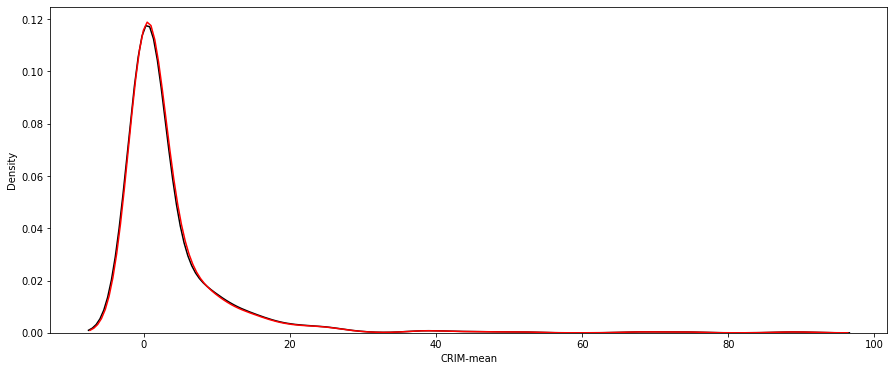

In [10]:
# let's visualize the distribution of mean and median-crim:
plt.figure(figsize=(15,6))
sn.distplot(df['CRIM'],hist = False,label='Actual crim',color='black')
sn.distplot(df['CRIM-mean'],hist=False,label='mean-crim',color='red')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


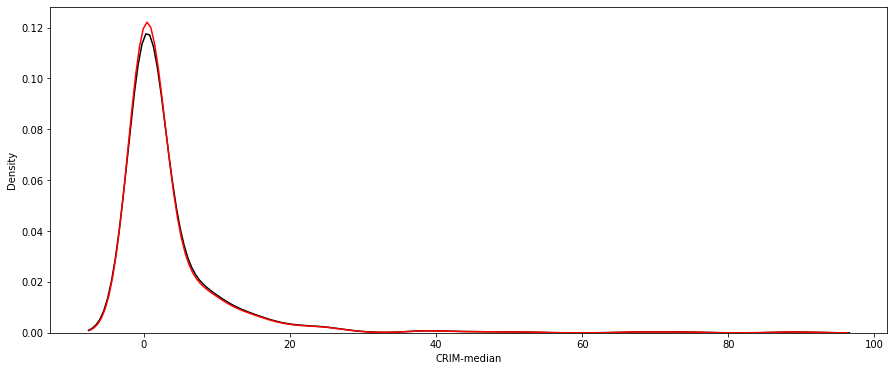

In [11]:
plt.figure(figsize=(15,6))
sn.distplot(df['CRIM'],hist = False,label='Actual crim',color='black')
sn.distplot(df['CRIM-median'],hist=False,label='median-crim',color='red')
plt.show()

In [12]:
# out of mean and median, we see that mean is performing well. so we fill all the null values in CRIM  columns by its mean.

In [13]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())

In [14]:
df['CRIM'].isnull().sum() # all the null vlaues removed.

0

In [15]:
# now let's drop the mean and median columns that we added for exploratory purpose.
df.drop(columns = ['CRIM-mean','CRIM-median'], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [16]:
# let's see the zn column.
df['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,   nan,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,
        22. ,  20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [17]:
df['ZN'].value_counts()

0.0      360
20.0      20
80.0      14
22.0      10
12.5      10
25.0      10
45.0       6
40.0       6
30.0       5
90.0       5
95.0       4
60.0       4
33.0       4
21.0       4
55.0       3
70.0       3
75.0       3
52.5       3
35.0       2
82.5       2
28.0       2
85.0       2
17.5       1
100.0      1
34.0       1
18.0       1
Name: ZN, dtype: int64

In [18]:
# from the above, we find that 0 is occuring maximum  number of times, hence we replace the null values with 0.
df['ZN'] = df['ZN'].fillna(df['ZN'].mode()[0])

In [19]:
df['ZN'].isnull().sum()

0

In [20]:
# INDUS
# it is a continuously distributed data.

In [21]:
df['INDUS-MEAN'] = df['INDUS'].fillna(df['INDUS'].mean())
df['INDUS-MEDIAN'] = df['INDUS'].fillna(df['INDUS'].median())
df['INDUS-MODE'] = df['INDUS'].fillna(df['INDUS'].mode()[0])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


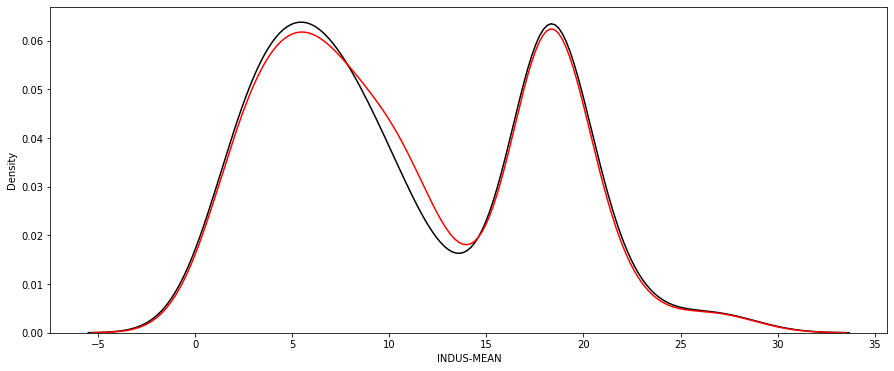

In [22]:
#let's see the plot of the three figures.
plt.figure(figsize=(15,6))
sn.distplot(df['INDUS'],hist = False,label='Actual INDUS',color='black')
sn.distplot(df['INDUS-MEAN'],hist=False,label='meAN-indus',color='red')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


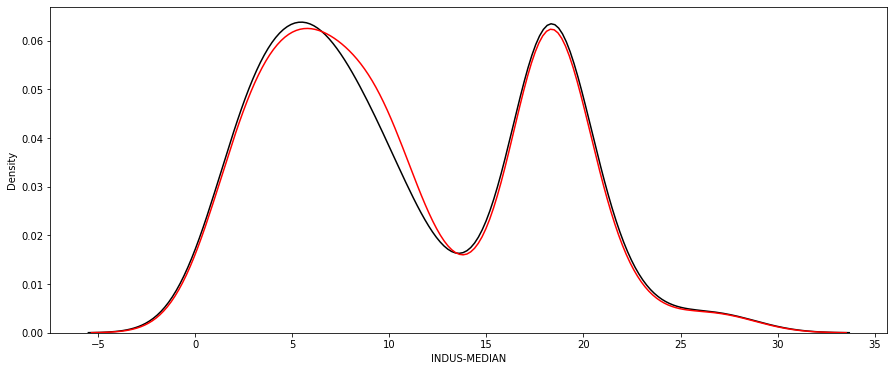

In [23]:
plt.figure(figsize=(15,6))
sn.distplot(df['INDUS'],hist = False,label='Actual INDUS',color='black')
sn.distplot(df['INDUS-MEDIAN'],hist=False,label='meDIAN-indus',color='red')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


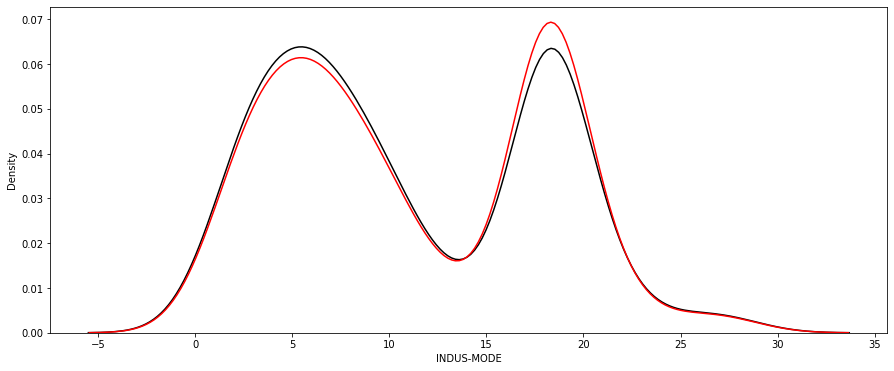

In [24]:
plt.figure(figsize=(15,6))
sn.distplot(df['INDUS'],hist = False,label='Actual INDUS',color='black')
sn.distplot(df['INDUS-MODE'],hist=False,label='mODE-indus',color='red')
plt.show()

In [25]:
# we will replace the null data by any of mean or median.
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())

In [26]:
df['INDUS'].isnull().sum()

0

In [27]:
#  CHAS, AGE, LSTATS remains now.
# CHAS.


In [28]:
df['CHAS'].value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

In [29]:
# replacing all the null values with 0's since it is in maximum number.
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])

In [30]:
df['CHAS'].isnull().sum()

0

In [31]:
# Age: 
df['AGE'].value_counts()
# most of the people are old aged.

100.0    42
87.9      4
97.9      4
98.8      4
96.0      4
         ..
89.8      1
68.8      1
29.1      1
38.9      1
89.3      1
Name: AGE, Length: 348, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

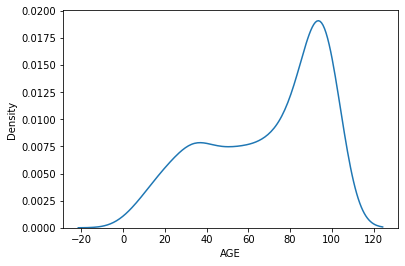

In [32]:
sn.distplot(df['AGE'], hist  = False)

In [33]:
# replacing the null values with mean and median and then seeign the plot.
df['age-mean'] = df['AGE'].fillna(df['AGE'].mean())
df['age-medain']=df['AGE'].fillna(df['AGE'].median())

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


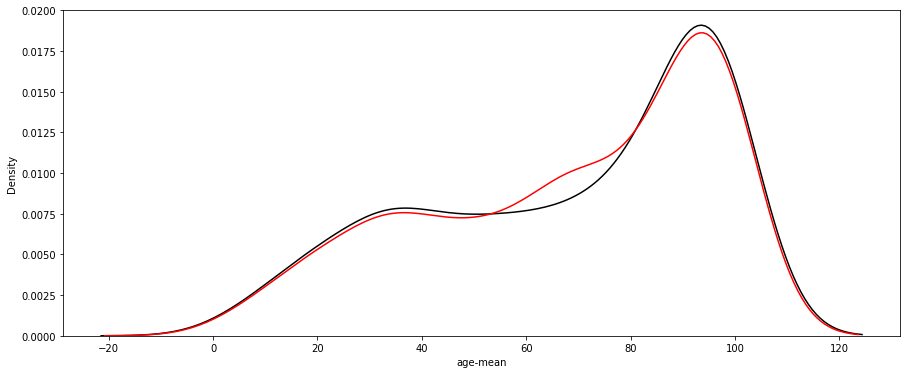

In [34]:
plt.figure(figsize=(15,6))
sn.distplot(df['AGE'],hist = False,label='Actual age',color='black')
sn.distplot(df['age-mean'],hist=False,label='mODE-age',color='red')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


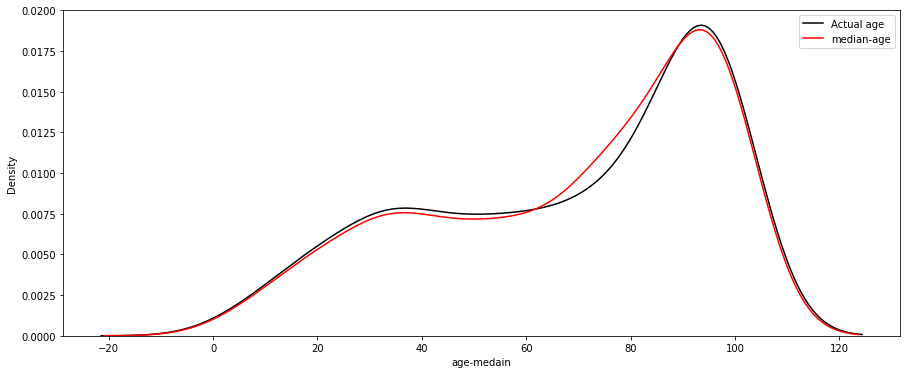

In [35]:
plt.figure(figsize=(15,6))
sn.distplot(df['AGE'],hist = False,label='Actual age',color='black')
sn.distplot(df['age-medain'],hist=False,label='median-age',color='red')
plt.legend()
plt.show()

In [36]:
"""import scipy.stats as stats
stats.probplot(df['AGE'],dist='norm',plot=plt) # prob plot"""

"import scipy.stats as stats\nstats.probplot(df['AGE'],dist='norm',plot=plt) # prob plot"

In [37]:
# we find median to be better than mean, 
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [38]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CRIM-mean', 'CRIM-median',
       'INDUS-MEAN', 'INDUS-MEDIAN', 'INDUS-MODE', 'age-mean', 'age-medain'],
      dtype='object')

In [39]:
df = df.drop(columns=['CRIM-mean', 'CRIM-median',
       'INDUS-MEAN', 'INDUS-MEDIAN', 'INDUS-MODE', 'age-mean', 'age-medain'],axis  = 1)

In [40]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

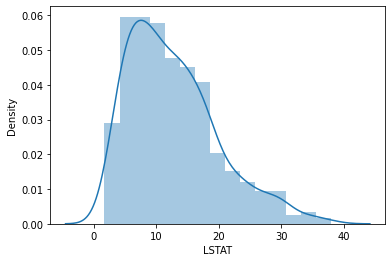

In [41]:
# LSTATS.----> continuously distributed data.
sn.distplot(df['LSTAT'])

In [42]:
# data is left skewed. need to be trasformed to gaussian distribution.

In [43]:
# replacing null values witht he mean/ median and then observing the combined plot of the two.
df['lstat-mean']  = df['LSTAT'].fillna(df['LSTAT'].mean())
df['lstat-med'] = df['LSTAT'].fillna(df['LSTAT'].median())

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


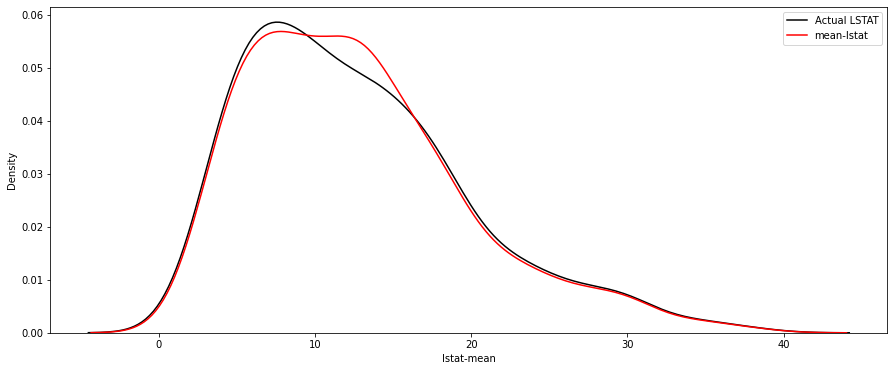

In [44]:
plt.figure(figsize=(15,6))
sn.distplot(df['LSTAT'],hist = False,label='Actual LSTAT',color='black')
sn.distplot(df['lstat-mean'],hist=False,label='mean-lstat',color='red')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


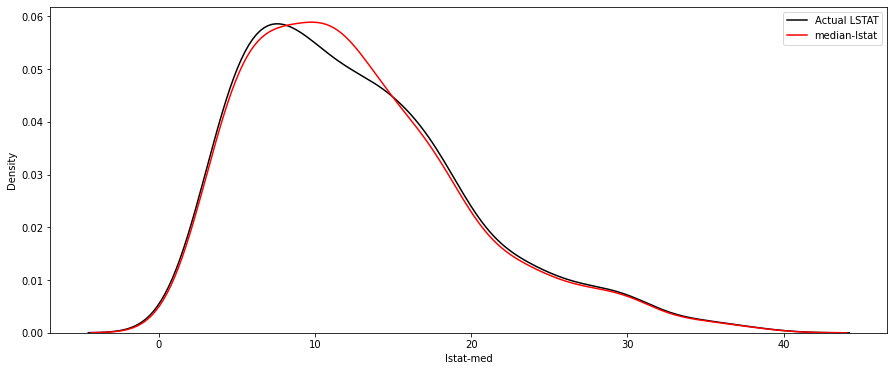

In [45]:
plt.figure(figsize=(15,6))
sn.distplot(df['LSTAT'],hist = False,label='Actual LSTAT',color='black')
sn.distplot(df['lstat-med'],hist=False,label='median-lstat',color='red')
plt.legend()
plt.show()

In [46]:
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].median())

In [47]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat-mean,lstat-med
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,4.98,4.98


In [48]:
df = df.drop(columns= ['lstat-mean', 'lstat-med'], axis = 1)

In [49]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


<AxesSubplot:>

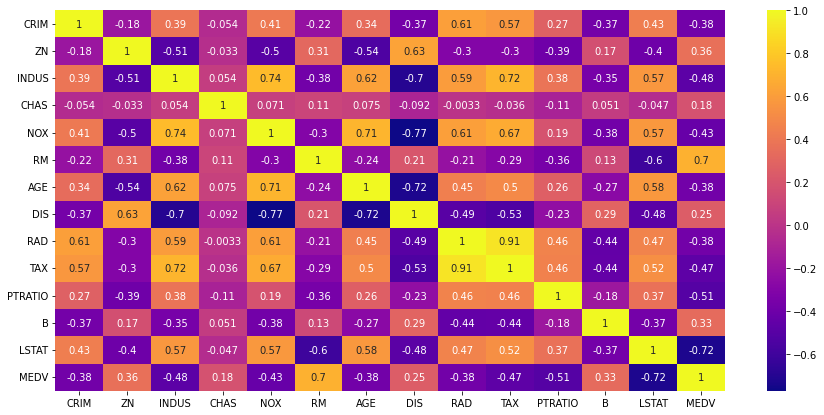

In [50]:
# finding the duplicated rows.
# checking the correlation of the data with the MEDV column.
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [51]:
df.corr()['MEDV']

CRIM      -0.379695
ZN         0.362292
INDUS     -0.478657
CHAS       0.183844
NOX       -0.427321
RM         0.695360
AGE       -0.377572
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.723093
MEDV       1.000000
Name: MEDV, dtype: float64

In [52]:
# from the correlation values, we don't find any multicollinearity in the dataset. 
# also all the features seems relevant to be taken.

In [53]:
# let's see the p-value of the dataset.
import statsmodels.api as sm  
from statsmodels.formula.api import ols  

In [54]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [55]:
# performing anova test on the dataset.

In [56]:
import statsmodels.api as sm

mymod = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
result = mymod.fit()

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              872.7
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:07:02   Log-Likelihood:                         -1528.9
No. Observations:                 506   AIC:                                      3084.
Df Residuals:                     493   BIC:                                      3139.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0946      0.034     -2.761      0.006      -0.162      -0.027
ZN             0.0444      0.014      3.146      0.002       0.017       0.072
INDUS         -0.0459      0.064     -0.722      0.471      -0.171       0.079
CHAS           3.1468      0.922      3.412      0.001       1.335       4.959
NOX           -2.8886      3.320     -0.870      0.385      -9.412       3.635
RM             6.0416      0.307     19.682      0.000       5.439       6.645
AGE           -0.0139      0.013     -1.032      0.303      -0.040       0.013
DIS           -0.9785      0.191     -5.129      0.000      -1.353      -0.604
RAD            0.1471      0.067      2.191      0.029       0.015       0.279
TAX           -0.0082      0.004     -2.083      0.038      -0.016      -0.000
PTRATIO       -0.4075      0.111     -3.668      0.000      -0.626      -0.189
B              0.0145      0.003      5.324      0.000       0.009       0.020
LSTAT         -0.3774      0.050     -7.546      0.000      -0.476      -0.279
==============================================================================
Omnibus:                      209.753   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1470.682
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      10.673   Cond. No.                     8.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
mymod = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
result = mymod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              946.3
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:07:02   Log-Likelihood:                         -1529.2
No. Observations:                 506   AIC:                                      3082.
Df Residuals:                     494   BIC:                                      3133.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0938      0.034     -2.739      0.006      -0.161      -0.027
ZN             0.0453      0.014      3.225      0.001       0.018       0.073
CHAS           3.0800      0.917      3.358      0.001       1.278       4.882
NOX           -3.4769      3.217     -1.081      0.280      -9.798       2.844
RM             6.0801      0.302     20.122      0.000       5.486       6.674
AGE           -0.0140      0.013     -1.042      0.298      -0.040       0.012
DIS           -0.9423      0.184     -5.122      0.000      -1.304      -0.581
RAD            0.1598      0.065      2.467      0.014       0.033       0.287
TAX           -0.0094      0.004     -2.641      0.009      -0.016      -0.002
PTRATIO       -0.4189      0.110     -3.810      0.000      -0.635      -0.203
B              0.0146      0.003      5.368      0.000       0.009       0.020
LSTAT         -0.3786      0.050     -7.578      0.000      -0.477      -0.280
==============================================================================
Omnibus:                      210.146   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.852
Skew:                           1.653   Prob(JB):                         0.00
Kurtosis:                      10.677   Cond. No.                     8.06e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#REMOVEDED the 'age' column.

In [60]:
mymod = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
result = mymod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1032.
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:07:03   Log-Likelihood:                         -1529.7
No. Observations:                 506   AIC:                                      3081.
Df Residuals:                     495   BIC:                                      3128.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0944      0.034     -2.757      0.006      -0.162      -0.027
ZN             0.0470      0.014      3.365      0.001       0.020       0.074
CHAS           3.0406      0.916      3.318      0.001       1.240       4.841
NOX           -4.3957      3.094     -1.421      0.156     -10.475       1.684
RM             6.0231      0.297     20.265      0.000       5.439       6.607
DIS           -0.8780      0.173     -5.065      0.000      -1.219      -0.537
RAD            0.1640      0.065      2.536      0.012       0.037       0.291
TAX           -0.0095      0.004     -2.677      0.008      -0.017      -0.003
PTRATIO       -0.4245      0.110     -3.866      0.000      -0.640      -0.209
B              0.0145      0.003      5.325      0.000       0.009       0.020
LSTAT         -0.3939      0.048     -8.245      0.000      -0.488      -0.300
==============================================================================
Omnibus:                      205.235   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1391.452
Skew:                           1.618   Prob(JB):                    7.08e-303
Kurtosis:                      10.452   Cond. No.                     7.70e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# removed 'NOX' column.

In [62]:
mymod = sm.OLS(df['MEDV'], df[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
result = mymod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1133.
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:07:03   Log-Likelihood:                         -1530.7
No. Observations:                 506   AIC:                                      3081.
Df Residuals:                     496   BIC:                                      3124.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0927      0.034     -2.706      0.007      -0.160      -0.025
ZN             0.0490      0.014      3.520      0.000       0.022       0.076
CHAS           2.9543      0.915      3.227      0.001       1.156       4.753
RM             5.7878      0.247     23.431      0.000       5.302       6.273
DIS           -0.7926      0.163     -4.870      0.000      -1.112      -0.473
RAD            0.1748      0.064      2.719      0.007       0.049       0.301
TAX           -0.0113      0.003     -3.386      0.001      -0.018      -0.005
PTRATIO       -0.4314      0.110     -3.929      0.000      -0.647      -0.216
B              0.0140      0.003      5.183      0.000       0.009       0.019
LSTAT         -0.4236      0.043     -9.859      0.000      -0.508      -0.339
==============================================================================
Omnibus:                      201.832   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1303.771
Skew:                           1.603   Prob(JB):                    7.76e-284
Kurtosis:                      10.181   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# now all the p-values are less than 0.05., these features are important.
# so we will be moving with these features, rest will be dropped.

In [64]:
df = df.drop(columns=['INDUS','AGE','NOX'],axis=1)

In [65]:
df.head(2)

,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.0,6.575,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,0.0,6.421,4.9671,2,242,17.8,396.9,9.14,21.6


In [73]:
df.corr()['MEDV']

CRIM      -0.379695
ZN         0.362292
CHAS       0.183844
RM         0.695360
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.723093
MEDV       1.000000
Name: MEDV, dtype: float64

<AxesSubplot:>

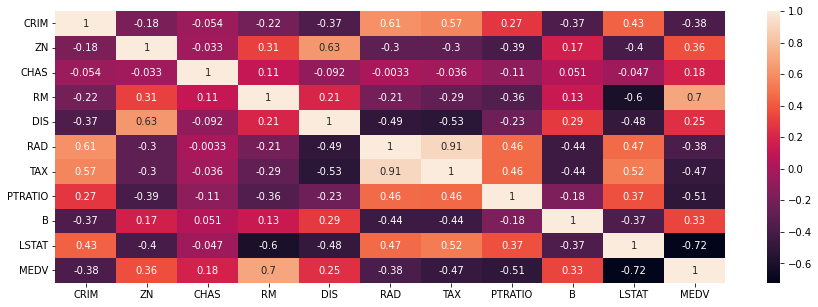

In [77]:
plt.figure(figsize=(15,5))
sn.heatmap(df.corr(),annot = True,data = df)

In [66]:
# separating the x, y variables.
x = df.iloc[:,:-1]
y = df['MEDV']

In [67]:
x.head(1)

,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,6.575,4.09,1,296,15.3,396.9,4.98


In [68]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# model building

In [110]:
# train, test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
x_train.shape,x_test.shape

((404, 10), (102, 10))

# multiple linear regression

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [111]:
# multiple linear regression
linReg = LinearRegression()


In [112]:
linReg.fit(x_train,y_train)

LinearRegression()

In [113]:
y_pred = linReg.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.5509863514208212
MAE 3.9419045816221594


In [84]:
# we can see that the multiple regression model is performing very bad here,
# let's do standard scaling/ minmax scaling and then check the r2 score.

# scaling the data

In [ ]:
# min max scaler and multiple linear regression.

In [121]:
# train, test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [122]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)


In [123]:
linReg.fit(x_train,y_train)
y_pred = linReg.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6456908789029008
MAE 3.64332159087542


In [102]:
# still the same accuracy score.

In [223]:
# train, test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [224]:
# standard scaling:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [232]:
# fitting the model.
linReg.fit(x_train,y_train)
y_pred = linReg.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6456908789029009
MAE 3.6433215908754186


In [114]:
# clearly all multiple regression is preformfing very bad even after scaling.

In [115]:
# now we will move with other regression models.

# decision Tree

In [238]:
# train, test split || since the x-test,x-train was earlier scaled. so we again need to train them.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [242]:
dc = DecisionTreeRegressor()
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6909854582858229
MAE 3.367664670658682


In [237]:
# we observed that even Decison Tree was performing worse on small test_size data.
# so we increased the test-size of the dataset to 0.33,

# random forest 

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [276]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8174851173438843
MAE 2.5515329341317377


In [ ]:
# for test_size = 0.2 --> random forest ===> accuracy = 75%.
# for test_size = 0.33---> random forest ===> accuracy = 82%

# support vector regression

In [298]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [297]:
sv = SVR(kernel='rbf')
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.19215326583930825
MAE 5.309749811732041


In [290]:
# the accuracy is too low. 19%.
# support vector is a distance based approach, hence, feature scaling needs to done before applying the model.

In [292]:
# standard scaling:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [312]:
sv = SVR(kernel='rbf')
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.5426881089013442
MAE 3.799903240929518


In [294]:
# accuracy increased to 55% using standard scaler.(minmax will gave around same accuracy.)


# lasso regresion 

In [313]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [318]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
y_pred=lasso_model.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6460417051678702
MAE 3.6260474674394763


# ridge regression

In [319]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [320]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6457114392889992
MAE 3.6431578707096572


In [321]:
# lasso and ridge gave almost same accuracy in the model prediction.

# xgboost and adaboost 

In [325]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [328]:
import xgboost as xgb

In [330]:
# Create the DMatrix data structure for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:linear',  # 'reg:linear' for regression or 'binary:logistic' for classification
    'eval_metric': 'rmse',  # Evaluation metric, e.g., 'rmse', 'mae'
    'max_depth': 3,
    'eta': 0.1,  # Learning rate
    'seed': 42
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)


[18:48:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [333]:
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7616958472990929
MAE 2.690554736474317


# adaboost

In [335]:
from sklearn.ensemble import AdaBoostRegressor

In [345]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Create an instance of the AdaBoost model
# For classification tasks:
adaboost_model = AdaBoostRegressor(n_estimators=50)  # You can adjust the number of estimators

# For regression tasks:
# adaboost_model = AdaBoostRegressor(n_estimators=50)

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_model.predict(X_test)
print('R2 score', metrics.r2_score(y_test,y_pred))
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7341148477612668
MAE 3.1820998407091095


In [346]:
# we see that, xgboost is performing better than  adaboost 

# accuracy of all the implemented models;

Random Forest >> XGBoost >> AdaBoost >> Decision Tree >> (lasso, ridge) >>  multiple liear regression >> SVR

In [347]:
# done